In [1]:
import numpy as np
import sys
sys.path.append(r"C:\Users\alasm\Masteroppgave\w3tp")
import w3t
import os
import h5py
from matplotlib import pyplot as plt
import matplotlib as mpl
import time
import csv
import pandas as pd


 
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.serif": ["Verdana"],
    "mathtext.fontset": "cm",
    "font.size": 14,             # Base font size
    "axes.titlesize": 16,        # Title font size
    "axes.labelsize": 14,        # Axis label size
    "xtick.labelsize": 12,       # X tick label size
    "ytick.labelsize": 12,       # Y tick label size
})


 
tic = time.perf_counter()
plt.close("all")

In [2]:
section_height = 0.0667
section_width = 0.366
section_length_1 = 2.68
section_length_2 = 2.66

poly = 2

In [3]:
#1D
test_name = "1D"
section_name_US = "MDS_1D_Harmonic"
section_name_DS = "MUS_1D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)


In [4]:
ads_list = []
val_list = []
expf_list = []

all_ads_gap1D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        #print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap1D.append(ads_US)

        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        #print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap1D.append(ads_DS)

In [5]:
#2D
test_name = "2D"
section_name_US = "MDS_2D_Harmonic"
section_name_DS = "MUS_2D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)

In [6]:
ads_list = []
val_list = []
expf_list = []

all_ads_gap2D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        #print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap2D.append(ads_US)

        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        #print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap2D.append(ads_DS)

In [7]:
#3D
test_name = "3D"
section_name_US = "MDS_3D_Harmonic"
section_name_DS = "MUS_3D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)

In [8]:
ads_list = []
val_list = []
expf_list = []

all_ads_gap3D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        #print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap3D.append(ads_US)

        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        #print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap3D.append(ads_DS)

In [9]:
#4D
test_name = "4D"
section_name_US = "MDS_4D_Harmonic"
section_name_DS = "MUS_4D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)

In [10]:
ads_list = []
val_list = []
expf_list = []

all_ads_gap4D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        #print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap4D.append(ads_US)

        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        #print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap4D.append(ads_DS)


In [11]:
#5D
test_name = "5D"
section_name_US = "MDS_5D_Harmonic"
section_name_DS = "MUS_5D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)

#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)

In [12]:
ads_list = []
val_list = []
expf_list = []


all_ads_gap5D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        #print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap5D.append(ads_US)

    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        #print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap5D.append(ads_DS)

In [13]:
test_name = "Single"
section_name = "Single_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments
h5_file = os.path.join(h5_input_path, section_name)
f = h5py.File((h5_file + ".hdf5"), "r")

data_set_groups = list(f)

exps = np.array([])

for data_set_group in data_set_groups:
    exps = np.append(exps,w3t.Experiment.fromWTT(f[data_set_group]))

tests_with_equal_motion = w3t.group_motions(exps)

ads_list = []
val_list = []
expf_list = []

all_ads = w3t.AerodynamicDerivatives2x2()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion[k1])-1):
        exp0 = exps[tests_with_equal_motion[k1][0]]
        exp1 = exps[tests_with_equal_motion[k1][k2+1]]
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)

        #print("Experiment " + str(tests_with_equal_motion[k1][0]))
        #print(exp0.motion_type())
        
        ads, val, expf = w3t.AerodynamicDerivatives2x2.fromWTT(exp0,exp1,section_width,section_length_1)
        ads_list.append(ads)
        val_list.append(val)
        expf_list.append(expf)
        all_ads.append(ads)   

In [14]:
poly_coeff_k_single, k_range_single = all_ads.fit_poly_k()
poly_coeff_k_1D, k_range_1D = all_ads_gap1D.fit_poly_k()
poly_coeff_k_2D, k_range_2D = all_ads_gap2D.fit_poly_k()
poly_coeff_k_3D, k_range_3D = all_ads_gap3D.fit_poly_k()
poly_coeff_k_4D, k_range_4D = all_ads_gap4D.fit_poly_k()
poly_coeff_k_5D, k_range_5D = all_ads_gap5D.fit_poly_k()

In [ ]:
file_path = ".\\Arrays_AD\\"

# Dictionary of arrays to save
arrays_to_save = {
    "poly_coeff_single": poly_coeff_k_single,
    "k_range_single": k_range_single,
    "poly_coeff_1D": poly_coeff_k_1D,
    "k_range_1D": k_range_1D,
    "poly_coeff_2D": poly_coeff_k_2D,
    "k_range_2D": k_range_2D,
    "poly_coeff_3D": poly_coeff_k_3D,
    "k_range_3D": k_range_3D,
    "poly_coeff_4D": poly_coeff_k_4D,
    "k_range_4D": k_range_4D,
    "poly_coeff_5D": poly_coeff_k_5D,
    "k_range_5D": k_range_5D,
}

# Save each array as a separate .npy file
# for name, array in arrays_to_save.items():
#     np.save(os.path.join(file_path, f"{name}.npy"), array)

In [16]:
vred_new = np.linspace(0, 8, 100)

all_ads_new = all_ads.from_poly_k(poly_coeff_k_single, k_range_single, vred_new)
all_ads_new_1D = all_ads_gap1D.from_poly_k(poly_coeff_k_1D, k_range_1D, vred_new)
all_ads_new_2D = all_ads_gap2D.from_poly_k(poly_coeff_k_2D, k_range_2D, vred_new)
all_ads_new_3D = all_ads_gap3D.from_poly_k(poly_coeff_k_3D, k_range_3D, vred_new)
all_ads_new_4D = all_ads_gap4D.from_poly_k(poly_coeff_k_4D, k_range_4D, vred_new)
all_ads_new_5D = all_ads_gap5D.from_poly_k(poly_coeff_k_5D, k_range_5D, vred_new)

C:\Users\alasm\Masteroppgave\w3tp\w3t\_ads2x2.py:1240: UserWarning: The figure layout has changed to tight
  fig_damping.tight_layout()
C:\Users\alasm\Masteroppgave\w3tp\w3t\_ads2x2.py:1241: UserWarning: The figure layout has changed to tight
  fig_stiffness.tight_layout()
C:\Users\alasm\Masteroppgave\w3tp\w3t\_ads4x4.py:1744: UserWarning: The figure layout has changed to tight
  fig_damping.tight_layout(rect=[0, 0, 1, 0.97])
C:\Users\alasm\Masteroppgave\w3tp\w3t\_ads4x4.py:1745: UserWarning: The figure layout has changed to tight
  fig_stiffness.tight_layout(rect=[0, 0, 1, 0.97])


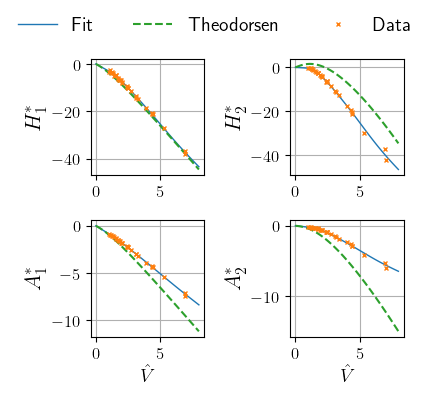

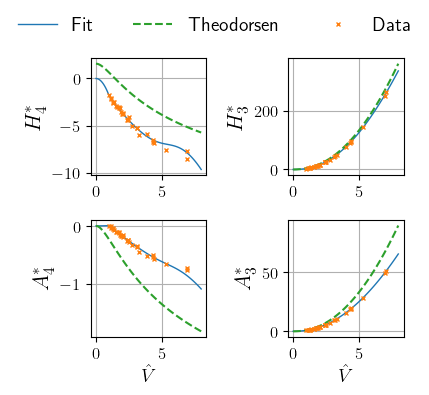

C:\Users\alasm\Masteroppgave\w3tp\w3t\_ads4x4.py:1640: UserWarning: The figure layout has changed to tight
  fig_damping.tight_layout()
C:\Users\alasm\Masteroppgave\w3tp\w3t\_ads4x4.py:1641: UserWarning: The figure layout has changed to tight
  fig_stiffness.tight_layout()


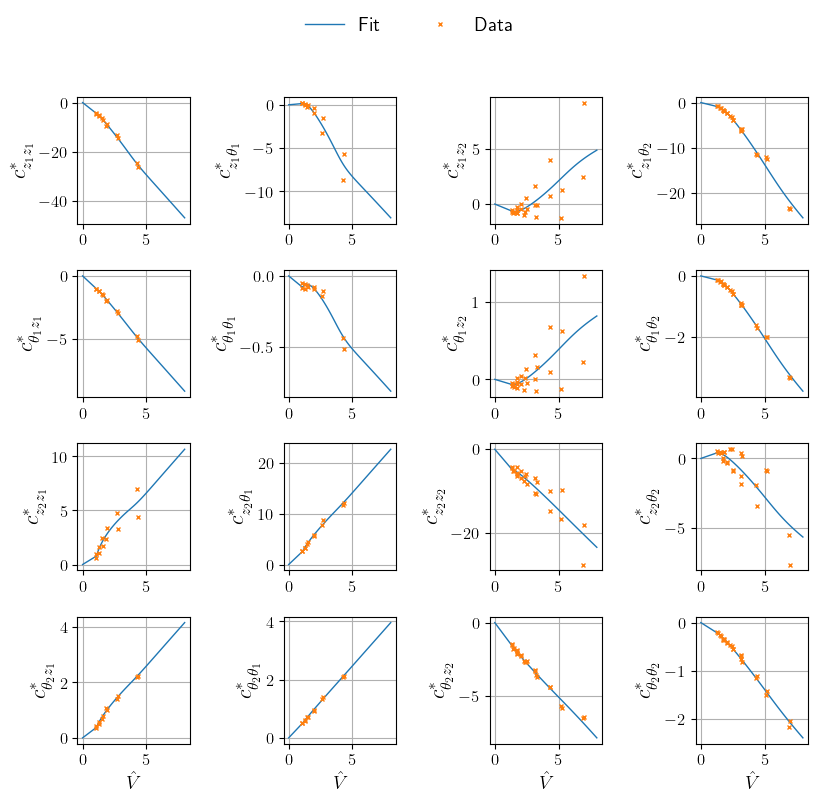

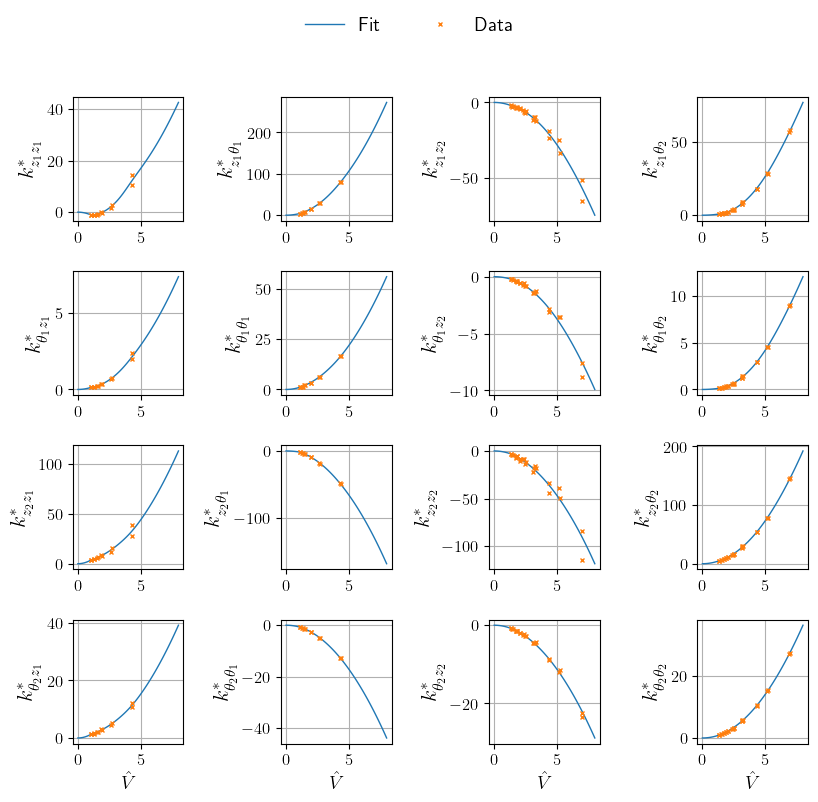

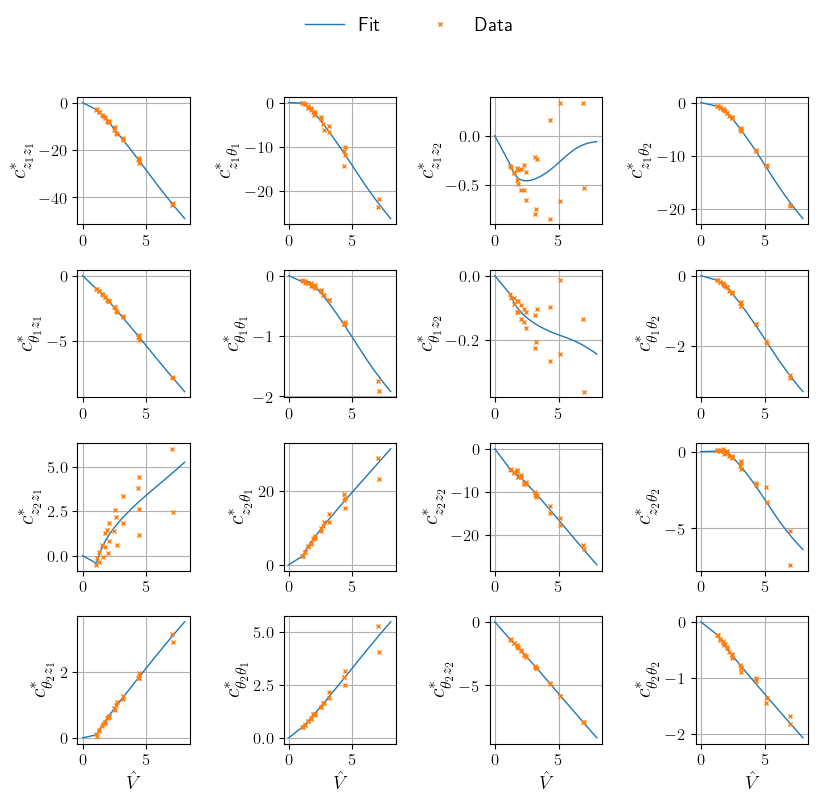

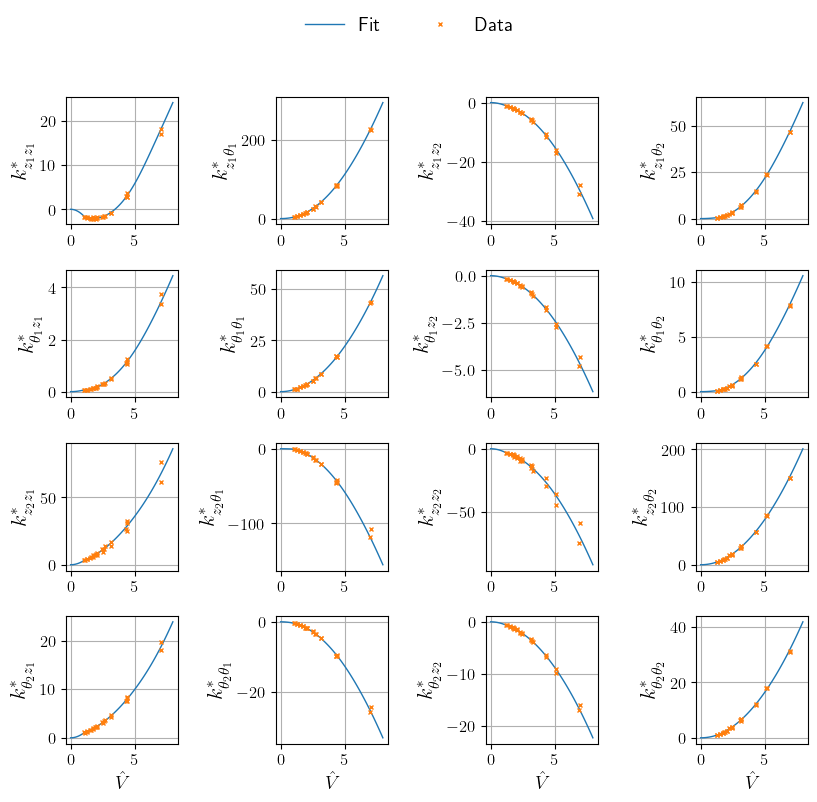

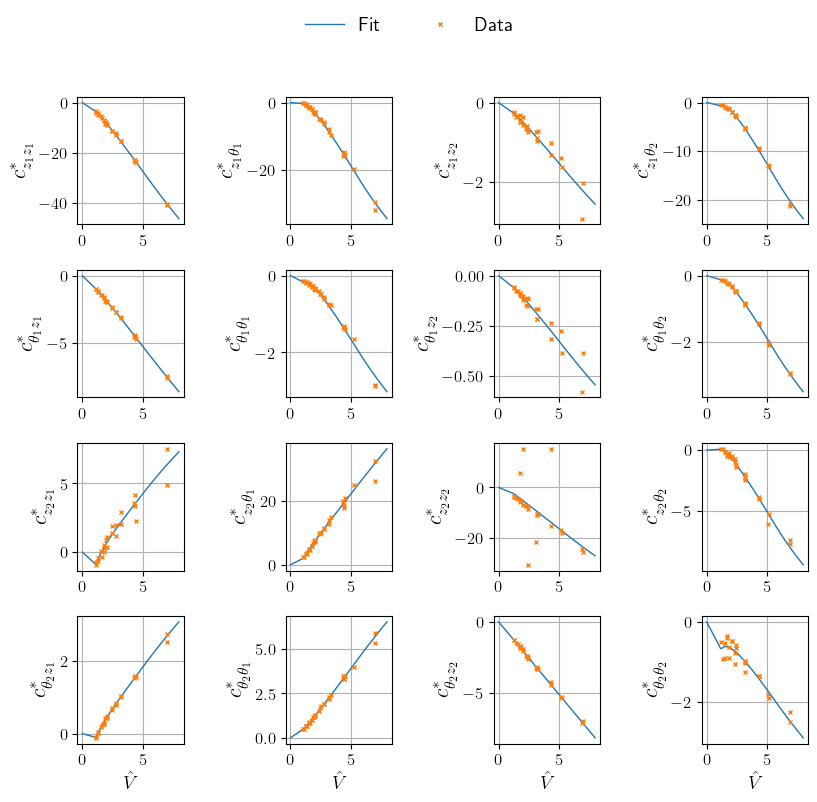

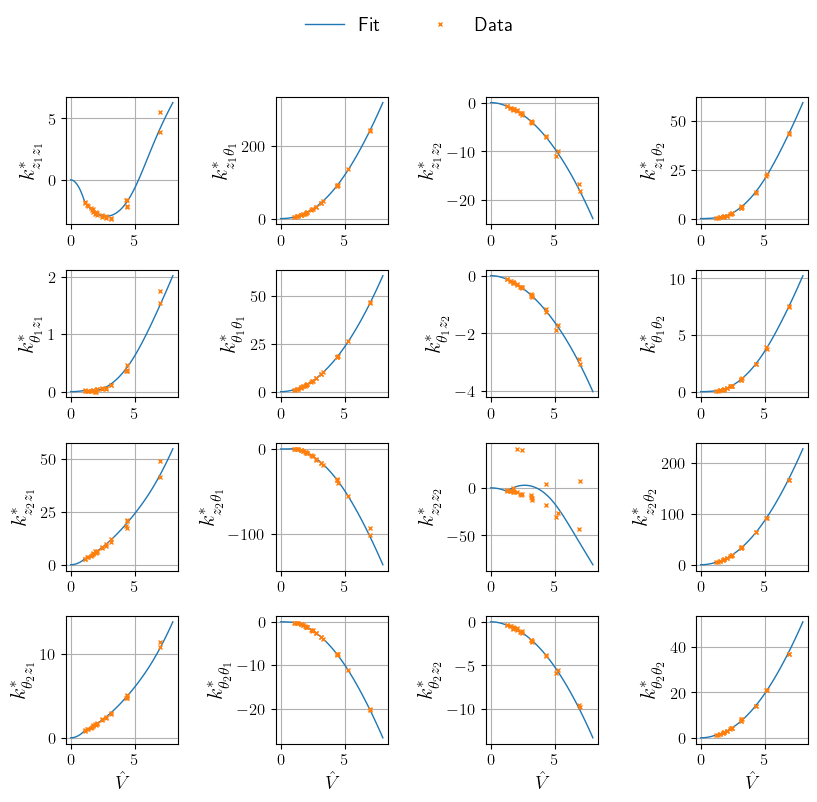

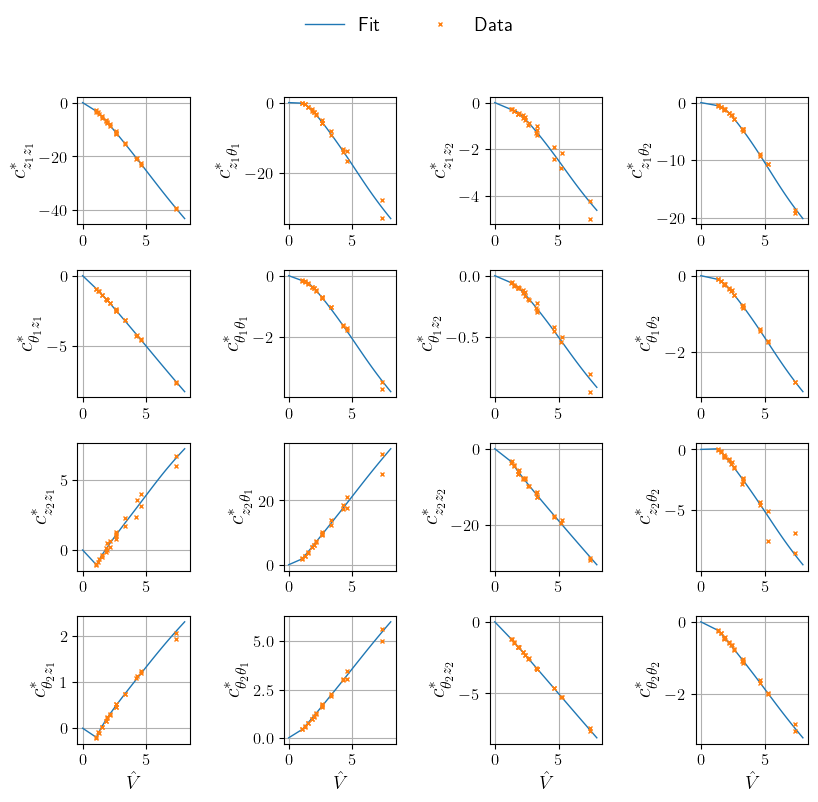

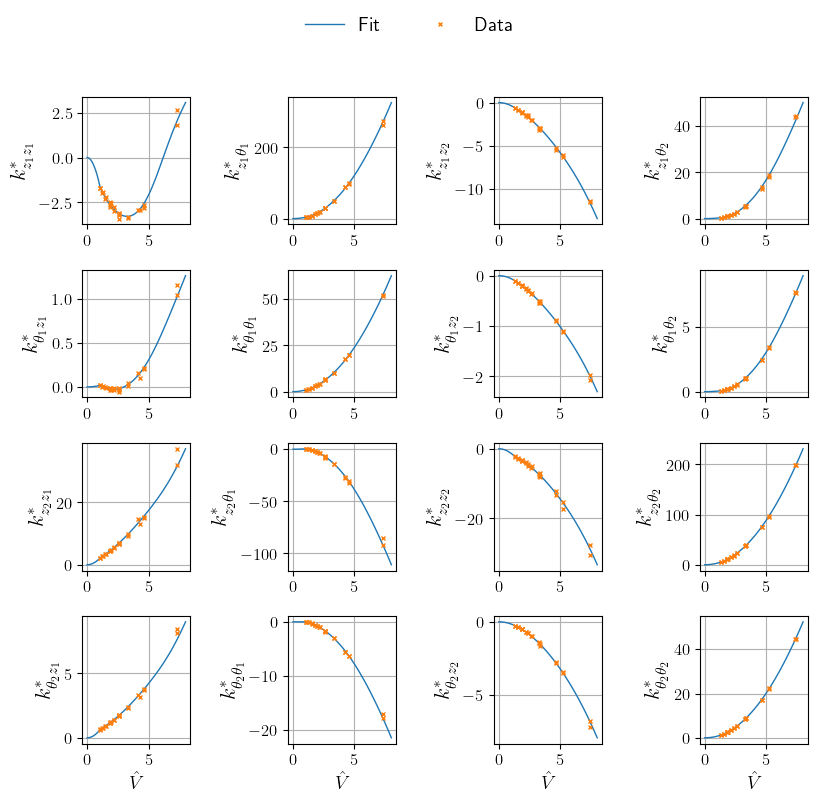

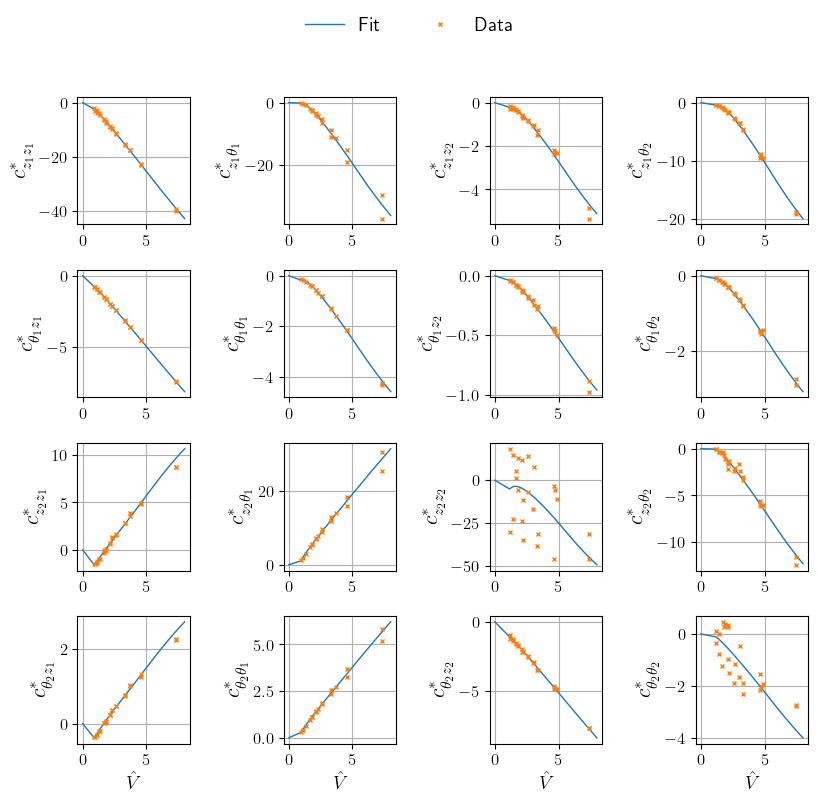

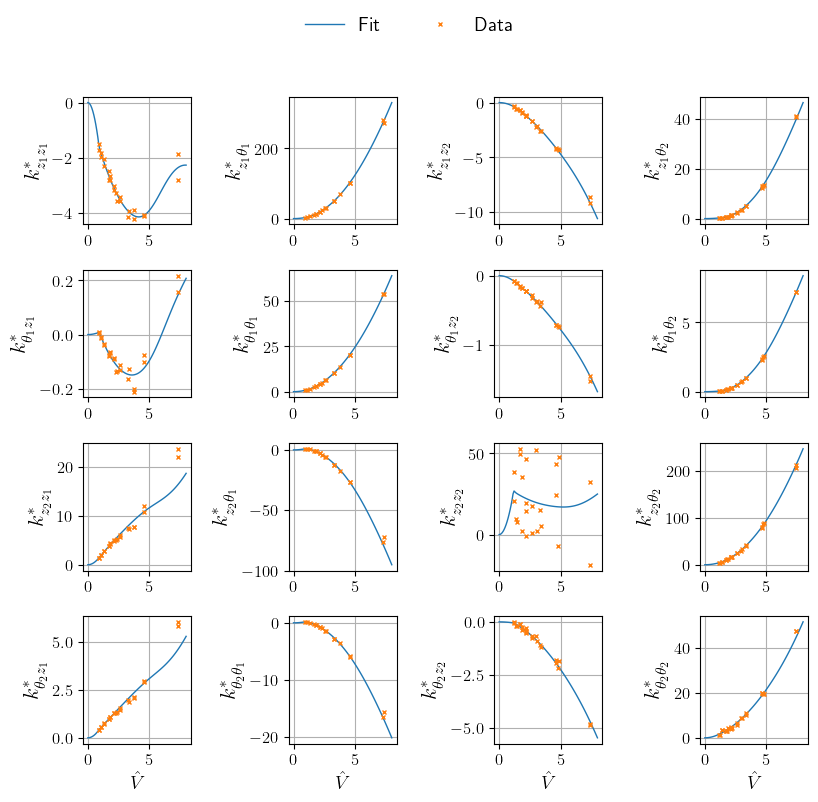

In [17]:
# --- Single configuration ---
fig_d, fig_s = w3t._ads4x4.plot_with_points(all_ads_new, all_ads, single=True)
# fig_d.savefig("AD_Singel_C.png", dpi=300, bbox_inches='tight')
# fig_s.savefig("AD_Singel_K.png", dpi=300, bbox_inches='tight')

# --- 1D configuration ---
fig_d, fig_s = w3t._ads4x4.plot_with_points(all_ads_new_1D, all_ads_gap1D)
# fig_d.savefig("AD_1D_C.png", dpi=300, bbox_inches='tight')
# fig_s.savefig("AD_1D_K.png", dpi=300, bbox_inches='tight')

# --- 2D configuration ---
fig_d, fig_s = w3t._ads4x4.plot_with_points(all_ads_new_2D, all_ads_gap2D)
# fig_d.savefig("AD_2D_C.png", dpi=300, bbox_inches='tight')
# fig_s.savefig("AD_2D_K.png", dpi=300, bbox_inches='tight')

# --- 3D configuration ---
fig_d, fig_s = w3t._ads4x4.plot_with_points(all_ads_new_3D, all_ads_gap3D)
# fig_d.savefig("AD_3D_C.png", dpi=300, bbox_inches='tight')
# fig_s.savefig("AD_3D_K.png", dpi=300, bbox_inches='tight')

# --- 4D configuration ---
fig_d, fig_s = w3t._ads4x4.plot_with_points(all_ads_new_4D, all_ads_gap4D)
# fig_d.savefig("AD_4D_C.png", dpi=300, bbox_inches='tight')
# fig_s.savefig("AD_4D_K.png", dpi=300, bbox_inches='tight')

# --- 5D configuration ---
fig_d, fig_s = w3t._ads4x4.plot_with_points(all_ads_new_5D, all_ads_gap5D)
# fig_d.savefig("AD_5D_C.png", dpi=300, bbox_inches='tight')
# fig_s.savefig("AD_5D_K.png", dpi=300, bbox_inches='tight')
        

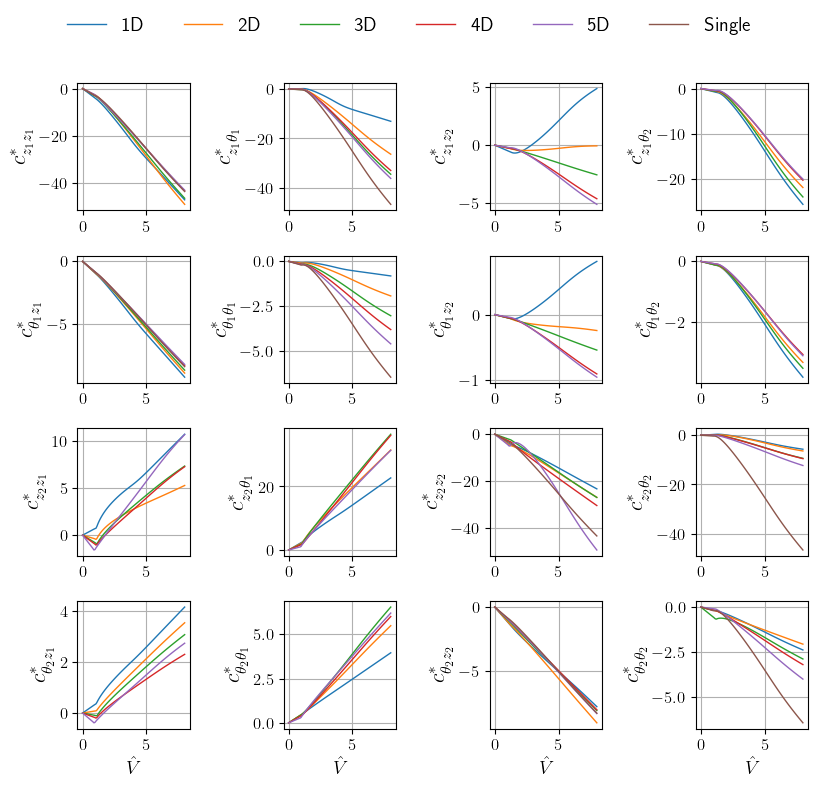

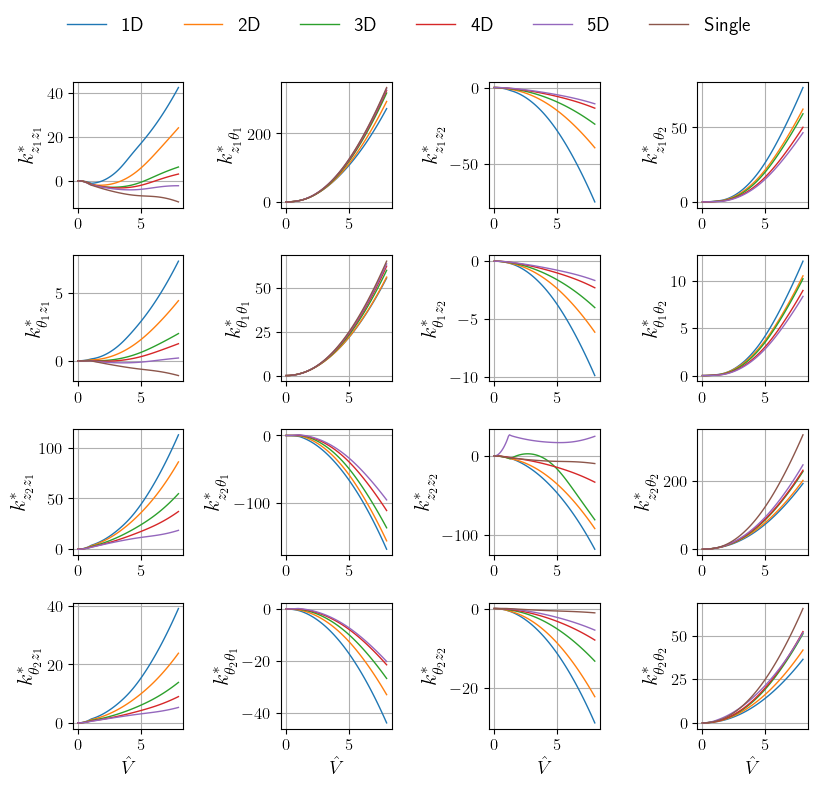

In [18]:
fig_d, fig_s = w3t._ads4x4.plot_compare_ny(all_ads_new, all_ads_new_1D, all_ads_new_2D, all_ads_new_3D, all_ads_new_4D, all_ads_new_5D)
# fig_d.savefig("AD_all_C.png", dpi=300, bbox_inches='tight')
# fig_s.savefig("AD_all_K.png", dpi=300, bbox_inches='tight')